In [21]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

In [22]:
file_path = "loan_data.xls"

In [23]:
# Load the dataset as a CSV file

loan_data = pd.read_csv(file_path)



# Display basic information about the dataset and the distribution of the target variable

loan_data_info = loan_data.info()

target_distribution = loan_data['not.fully.paid'].value_counts(normalize=True)



loan_data_info, target_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(None,
 not.fully.paid
 0    0.839946
 1    0.160054
 Name: proportion, dtype: float64)

Text(0, 0.5, 'Count')

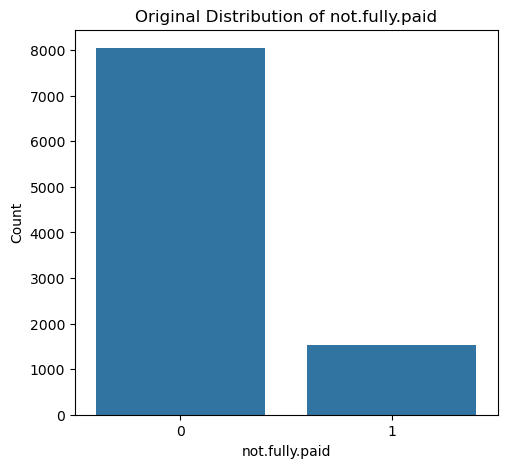

In [24]:
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Plot the original distribution of the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Original Distribution of not.fully.paid')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

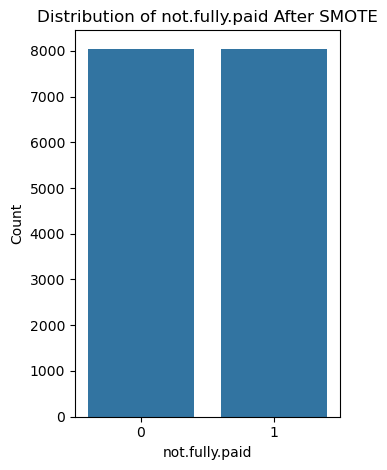

In [25]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Plot the distribution of the target variable after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution of not.fully.paid After SMOTE')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [26]:
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.Series(y_resampled, name='not.fully.paid')], axis=1)

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced_loan_data.csv', index=False)

Batch 1 size: 7018
not.fully.paid
0.0    0.500124
1.0    0.499876
Name: proportion, dtype: float64
Batch 2 size: 7041
not.fully.paid
1.0    0.500124
0.0    0.499876
Name: proportion, dtype: float64
Batch 3 size: 7038
not.fully.paid
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
Batch 4 size: 7061
not.fully.paid
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


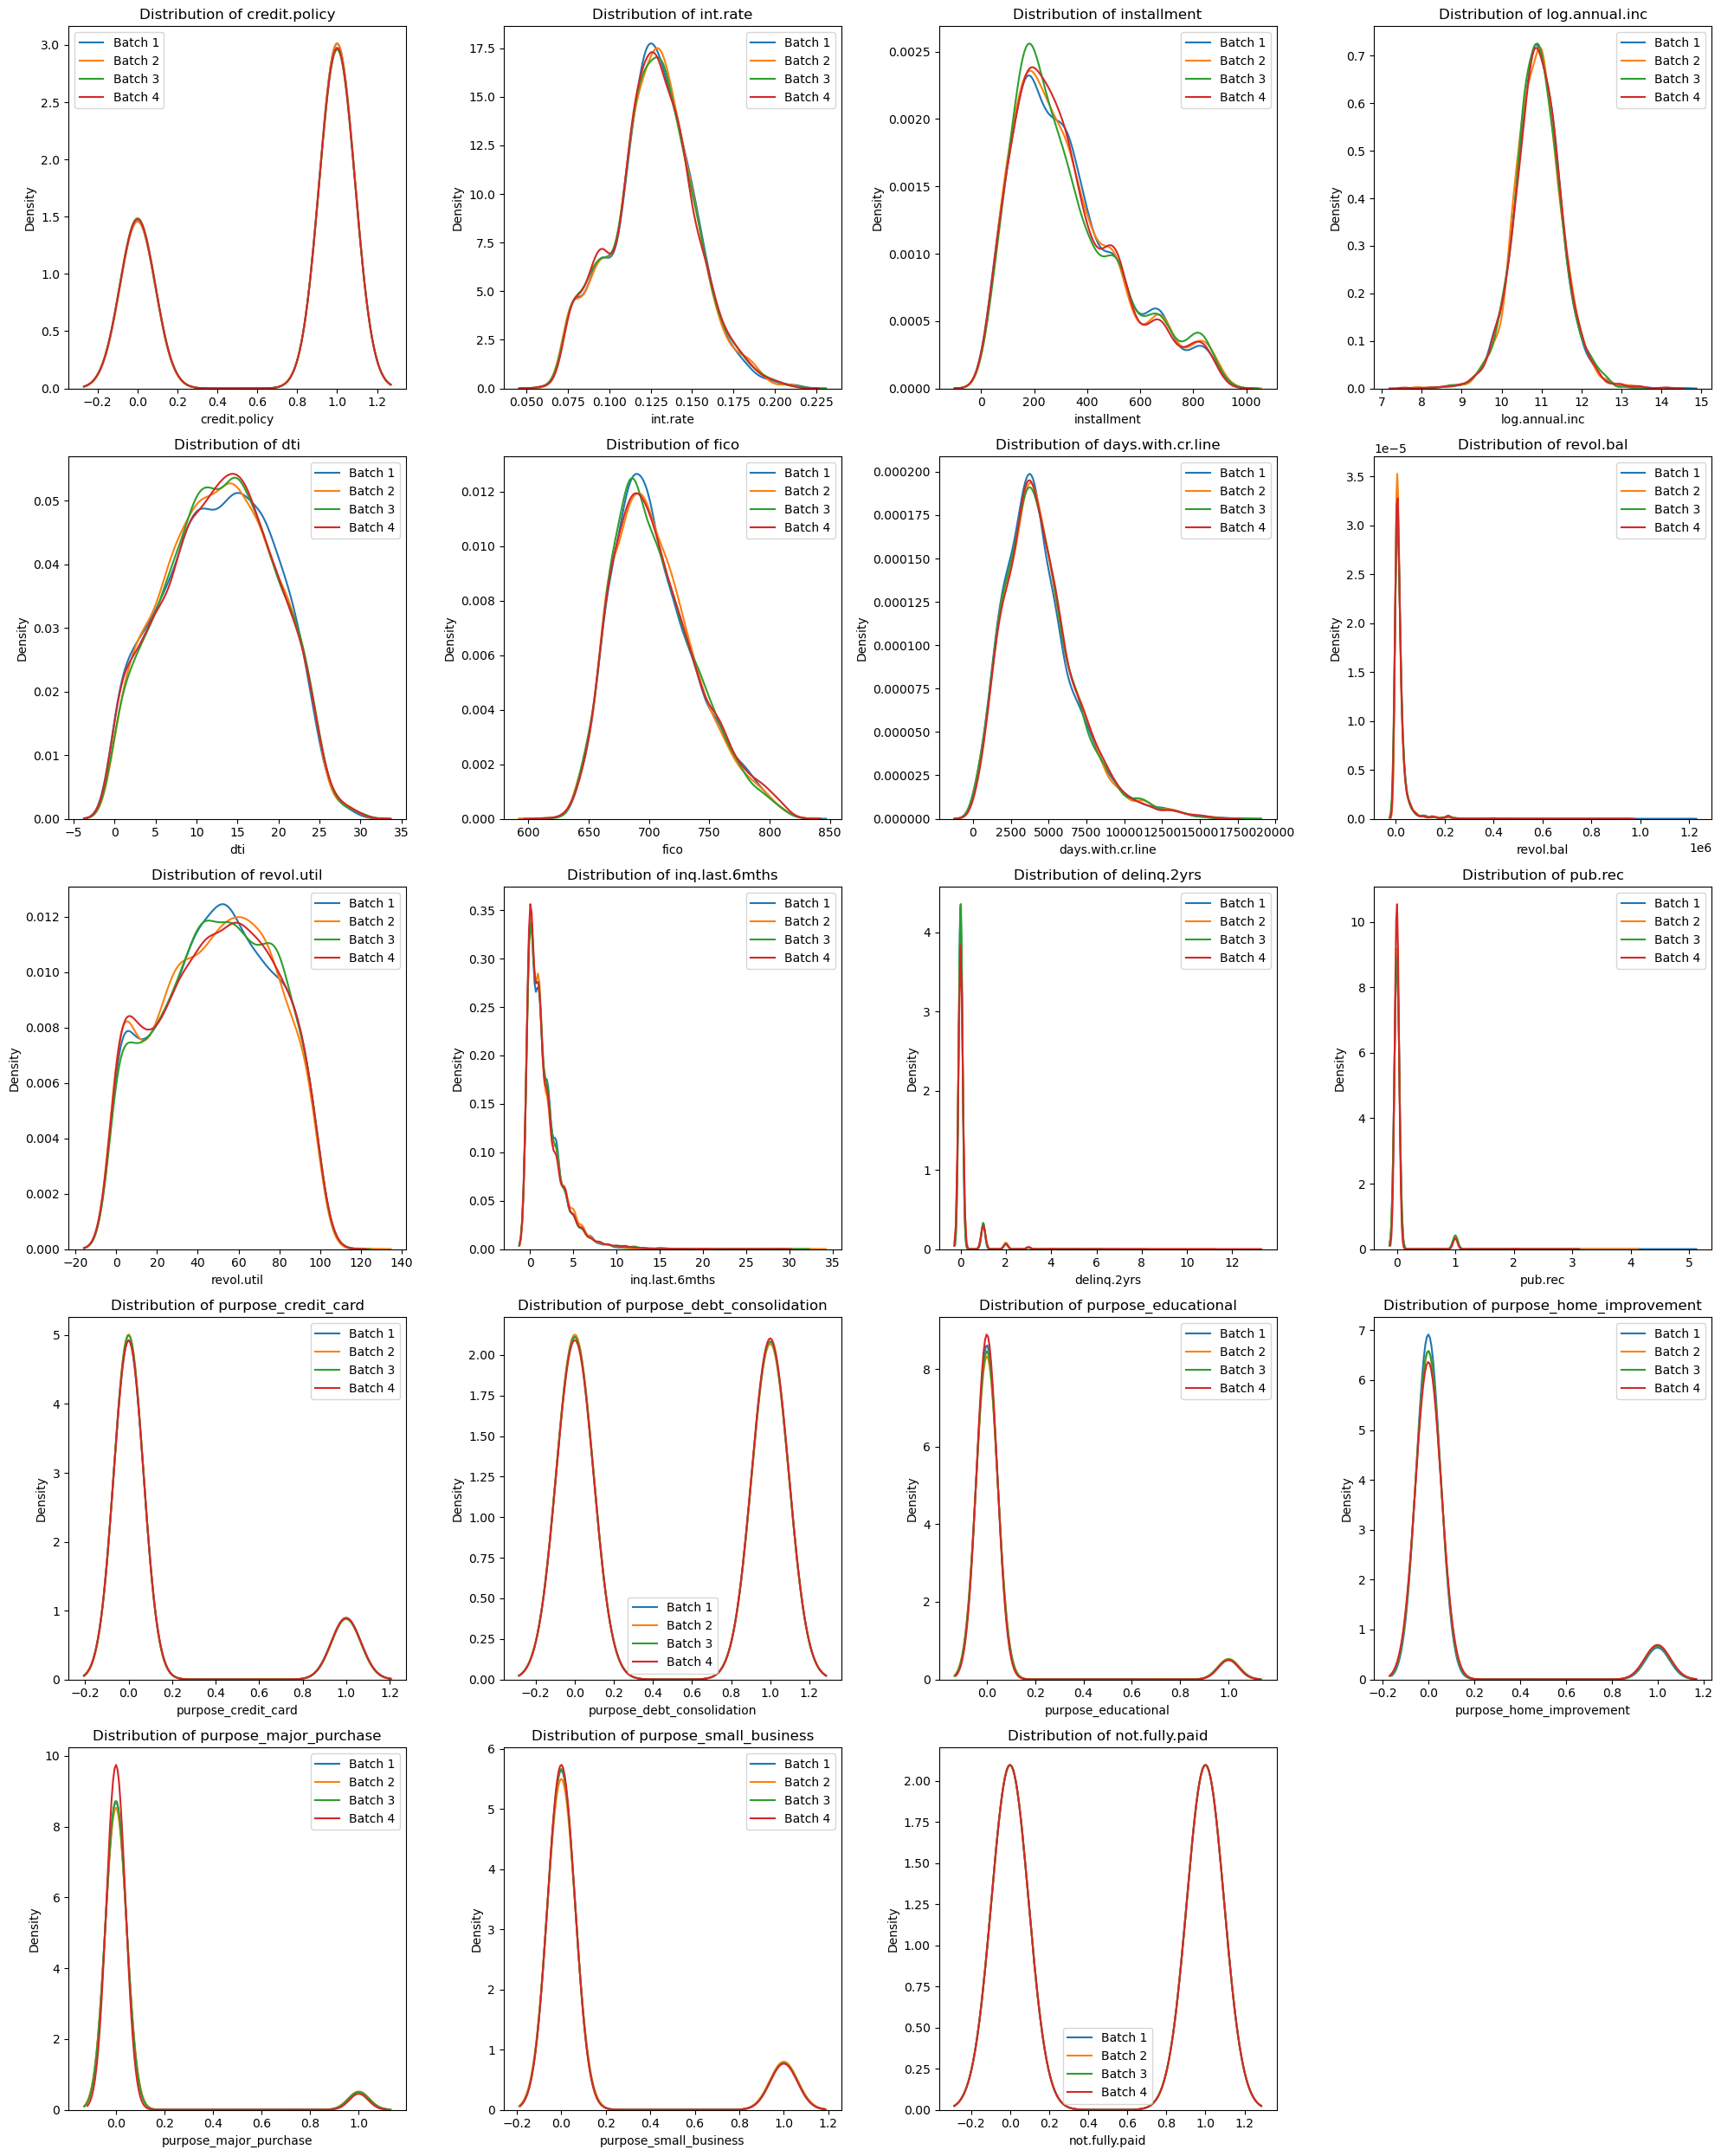

In [29]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the balanced dataset
data = pd.read_csv('balanced_loan_data.csv')

# Prepare the features and target variable
X = data.drop(['not.fully.paid'], axis=1)
y = data['not.fully.paid']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Create batches
batches = []
for train_index, test_index in skf.split(X, y):
    X_batch, y_batch = X.iloc[test_index], y.iloc[test_index]
    batch = pd.concat([X_batch, y_batch.reset_index(drop=True)], axis=1)
    batches.append(batch)

# Save batches to CSV files
for i, batch in enumerate(batches):
    batch.to_csv(f'batch_{i+1}.csv', index=False)

# Output the sizes of each batch to ensure they are similar
for i, batch in enumerate(batches):
    print(f'Batch {i+1} size: {len(batch)}')
    print(batch['not.fully.paid'].value_counts(normalize=True))

# Plot distributions of each column for all batches
columns = data.columns
n_cols = 4  # Number of columns for subplots
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

for col_idx, col in enumerate(columns):
    row = col_idx // n_cols
    col_position = col_idx % n_cols
    ax = axes[row, col_position]
    
    for i, batch in enumerate(batches):
        sns.kdeplot(batch[col], ax=ax, label=f'Batch {i+1}')
    
    ax.set_title(f'Distribution of {col}')
    ax.legend()

# Remove empty subplots
if len(columns) % n_cols != 0:
    for j in range(len(columns) % n_cols, n_cols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import os

def count_nan_values(batch_files):
    nan_counts = {}
    
    for batch_file in batch_files:
        if os.path.exists(batch_file):
            # Load the dataset
            data = pd.read_csv(batch_file)
            
            # Count NaN values for each column
            nan_count = data.isna().sum()
            
            # Store the result in the dictionary
            nan_counts[batch_file] = nan_count
    
    return nan_counts

# Define the list of batch files
batch_files = [f'batch_{i}.csv' for i in range(1, 6)]  # Adjust the range as needed

# Get the NaN counts for each batch
nan_counts = count_nan_values(batch_files)

# Print the NaN counts for each batch
for batch_file, counts in nan_counts.items():
    print(f"NaN counts for {batch_file}:")
    print(counts)
    print()


NaN counts for balanced_loan_data.csv:
credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
not.fully.paid                0
dtype: int64

NaN counts for batch_1.csv:
None

NaN counts for batch_2.csv:
None

NaN counts for batch_3.csv:
None

NaN counts for batch_4.csv:
None

NaN counts for batch_5.csv:
None

